<h1 style="text-align: center;">Deep Learning<br><br> (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
plt.rcParams["figure.figsize"] = (10,6)
sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)
# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv("Churn_Modelling.csv")

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [5]:
df.shape

(10000, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
df.drop(['RowNumber','CustomerId','Surname','Geography','Gender'],axis=1, inplace=True)

In [9]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.000,1,1,1,101348.880,1
1,608,41,1,83807.860,1,0,1,112542.580,0
2,502,42,8,159660.800,3,1,0,113931.570,1
3,699,39,1,0.000,2,0,0,93826.630,0
4,850,43,2,125510.820,1,1,1,79084.100,0


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480
Exited,10000.000,0.204,0.403,0.000,0.000,0.000,0.000,1.000


In [11]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

<AxesSubplot:xlabel='Exited', ylabel='count'>

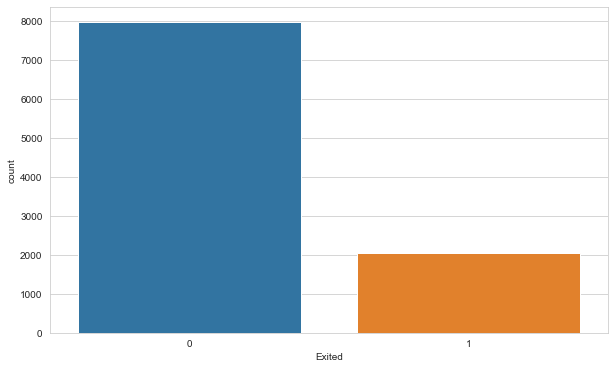

In [12]:
sns.countplot(df.Exited)

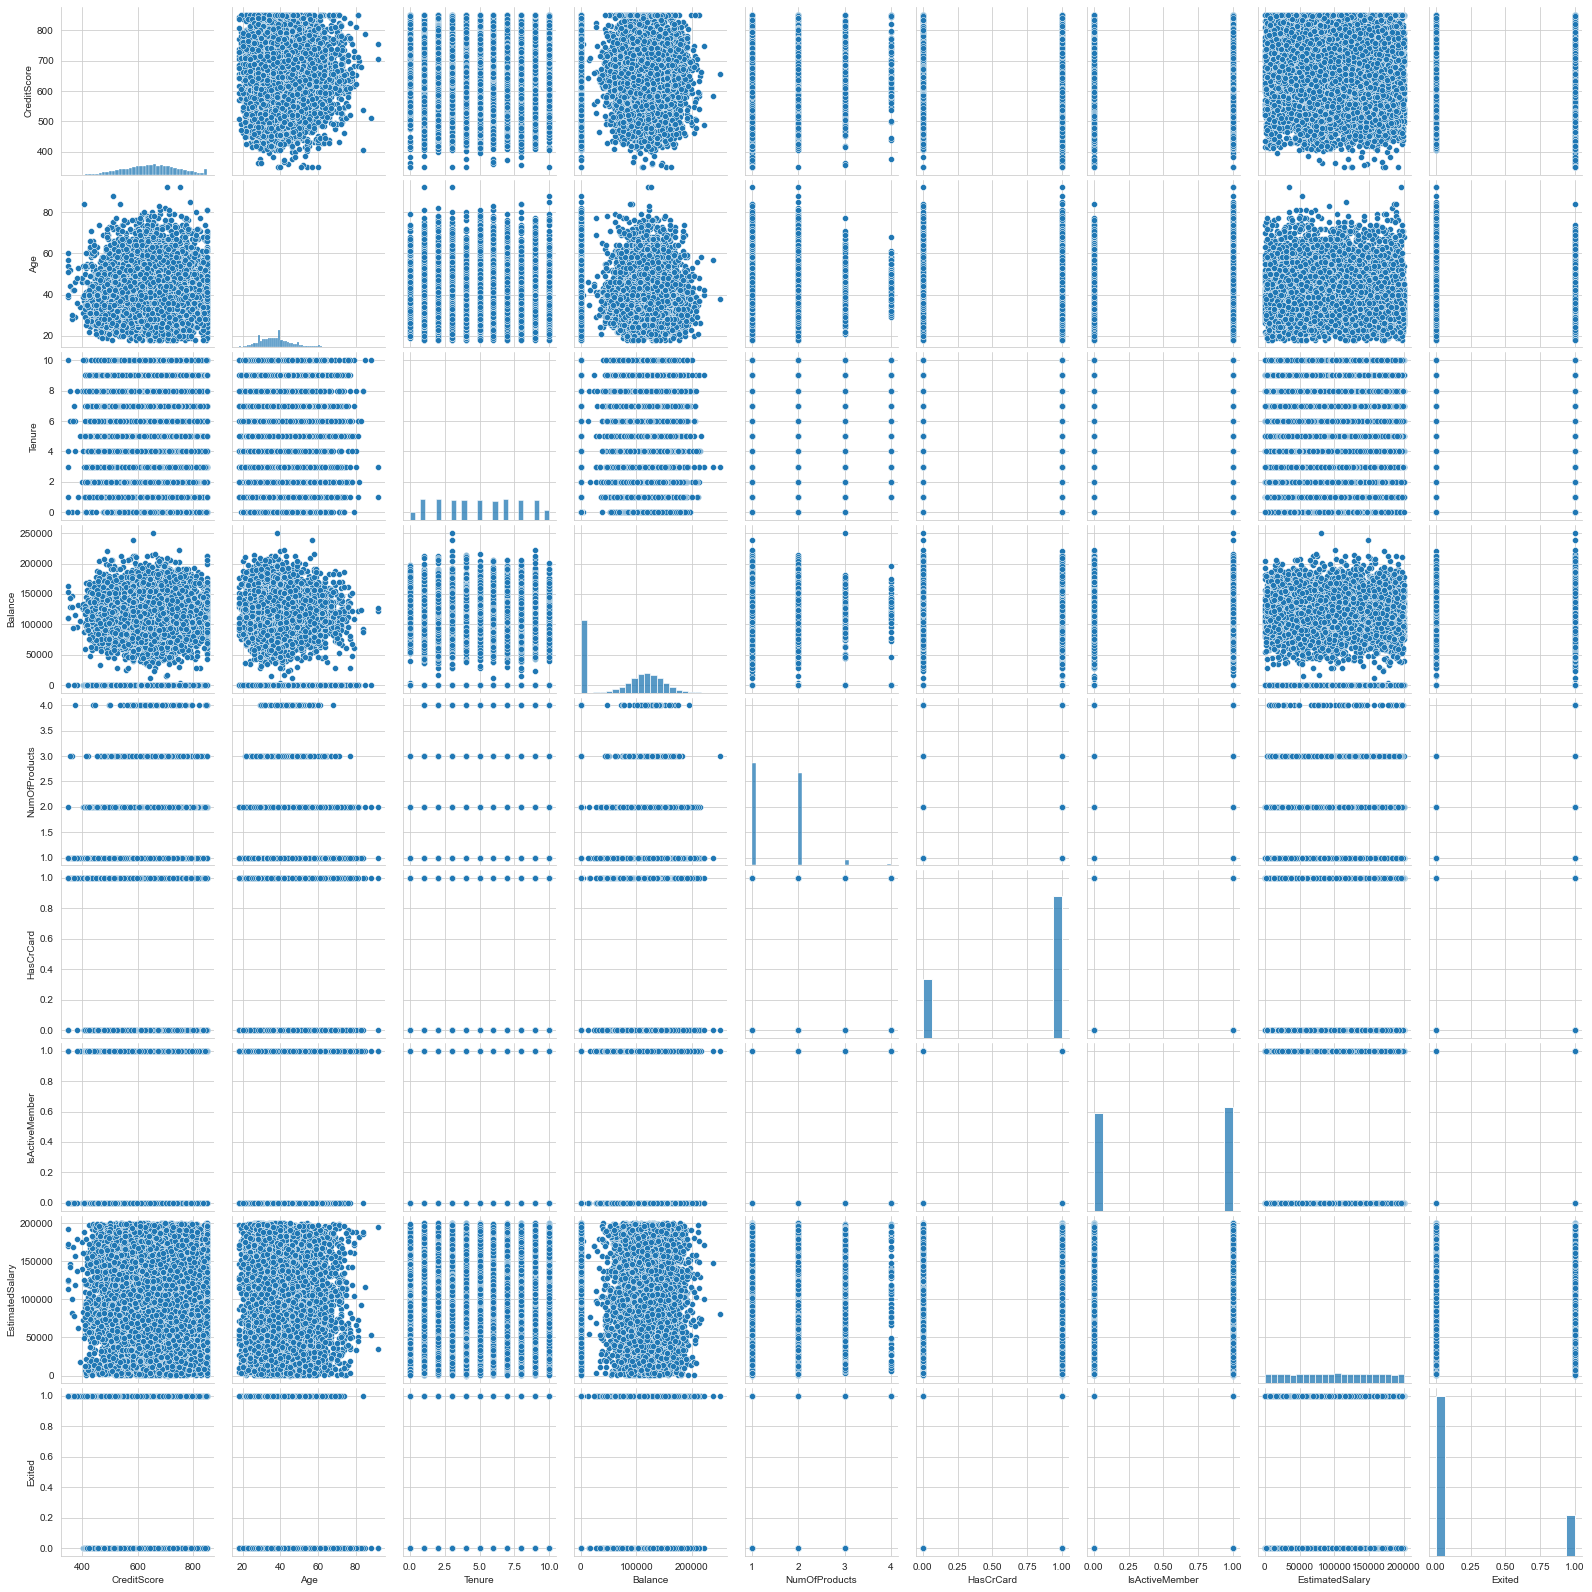

In [26]:
sns.pairplot(df)

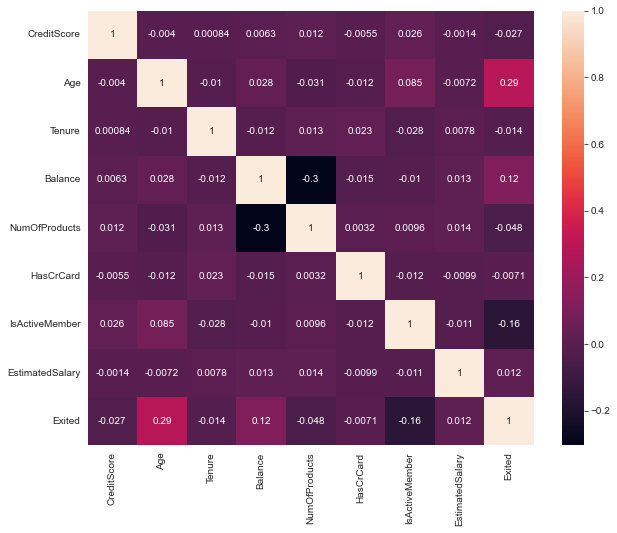

In [13]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True);

In [14]:
df.shape

(10000, 9)

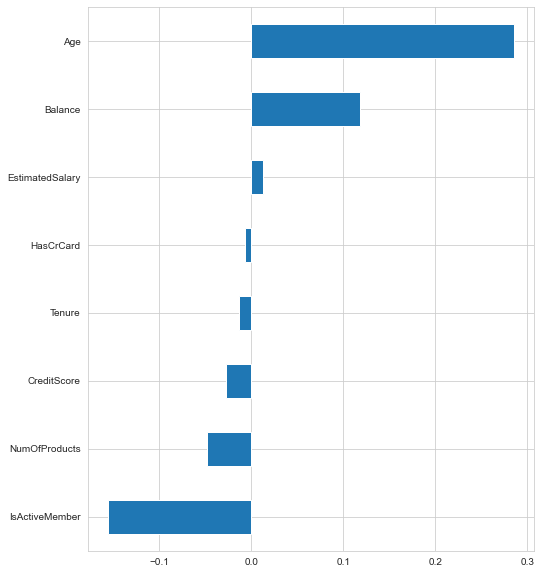

In [15]:
plt.figure(figsize = (8,10))
df.corr()['Exited'].sort_values().drop("Exited").plot(kind = "barh");

# Preprocessing of Data
- Train | Test Split, Scalling

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [17]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.10)

In [19]:
X_train.shape

(9000, 8)

In [20]:
X_test.shape

(1000, 8)

In [21]:
scaler = MinMaxScaler()

In [22]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelling & Model Performance

## without class_weigth

### Create The Model

In [27]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [31]:
model = Sequential()
model.add(Dense(12, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(6, activation = "relu"))
model.add(Dense(1, activation  = "sigmoid"))
opt = Adam(lr = 0.001)
model.compile(optimizer = opt , loss = "binary_crossentropy", metrics = ["Recall"])

In [32]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 64, epochs = 200, verbose = 1)

Epoch 1/200
127/127 [==============================] - 1s 2ms/step - loss: 0.5445 - recall: 0.0030 - val_loss: 0.5033 - val_recall: 0.0000e+00
Epoch 2/200
127/127 [==============================] - 0s 1ms/step - loss: 0.4959 - recall: 0.0000e+00 - val_loss: 0.4935 - val_recall: 0.0000e+00
Epoch 3/200
127/127 [==============================] - 0s 1ms/step - loss: 0.4827 - recall: 0.0000e+00 - val_loss: 0.4834 - val_recall: 0.0000e+00
Epoch 4/200
127/127 [==============================] - 0s 1ms/step - loss: 0.4683 - recall: 0.0079 - val_loss: 0.4728 - val_recall: 0.0055
Epoch 5/200
127/127 [==============================] - 0s 1ms/step - loss: 0.4543 - recall: 0.0424 - val_loss: 0.4607 - val_recall: 0.0164
Epoch 6/200
127/127 [==============================] - 0s 1ms/step - loss: 0.4429 - recall: 0.0848 - val_loss: 0.4493 - val_recall: 0.0820
Epoch 7/200
127/127 [==============================] - 0s 1ms/step - loss: 0.4346 - recall: 0.1170 - val_loss: 0.4404 - val_recall: 0.0874
Epoch 8

127/127 [==============================] - 0s 1ms/step - loss: 0.3524 - recall: 0.4121 - val_loss: 0.3621 - val_recall: 0.4372
Epoch 118/200
127/127 [==============================] - 0s 1ms/step - loss: 0.3520 - recall: 0.4103 - val_loss: 0.3612 - val_recall: 0.3497
Epoch 119/200
127/127 [==============================] - 0s 1ms/step - loss: 0.3519 - recall: 0.4164 - val_loss: 0.3595 - val_recall: 0.3607
Epoch 120/200
127/127 [==============================] - 0s 1ms/step - loss: 0.3519 - recall: 0.4139 - val_loss: 0.3590 - val_recall: 0.3552
Epoch 121/200
127/127 [==============================] - 0s 1ms/step - loss: 0.3525 - recall: 0.4164 - val_loss: 0.3638 - val_recall: 0.3169
Epoch 122/200
127/127 [==============================] - 0s 1ms/step - loss: 0.3524 - recall: 0.4067 - val_loss: 0.3614 - val_recall: 0.3661
Epoch 123/200
127/127 [==============================] - 0s 1ms/step - loss: 0.3519 - recall: 0.4085 - val_loss: 0.3616 - val_recall: 0.3552
Epoch 124/200
127/127 [====

In [33]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 12)                108       
                                                                 
 dense_7 (Dense)             (None, 6)                 78        
                                                                 
 dense_8 (Dense)             (None, 1)                 7         
                                                                 
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________


In [34]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.545,0.003,0.503,0.000
1,0.496,0.000,0.493,0.000
2,0.483,0.000,0.483,0.000
3,0.468,0.008,0.473,0.005
4,0.454,0.042,0.461,0.016


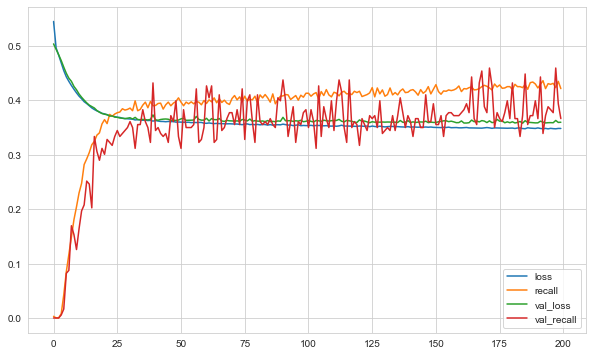

In [35]:
loss_df.plot();

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [36]:
model.evaluate(X_test, y_test, verbose=0)

[0.3451097309589386, 0.4166666567325592]

In [37]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("test_loss : ", loss)
print("test_Recall : ", recall)

loss :  0.3451097309589386
Recall :  0.4166666567325592


In [38]:
y_pred = model.predict(X_test) > 0.5 
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[780  16]
 [119  85]]
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       796
           1       0.84      0.42      0.56       204

    accuracy                           0.86      1000
   macro avg       0.85      0.70      0.74      1000
weighted avg       0.86      0.86      0.85      1000



### Precision-Recall Curve

32/32 [==============================] - 0s 949us/step


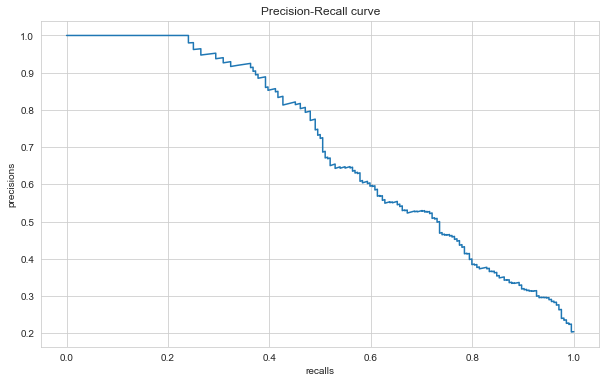

In [39]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve');

In [40]:
average_precision_score(y_test,y_pred_proba)

0.6999622655853569

## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [41]:
model = Sequential()
model.add(Dense(12, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(6, activation = "relu"))
model.add(Dense(1, activation  = "sigmoid"))
opt = Adam(lr = 0.001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [42]:
from sklearn.utils import class_weight
# https://datascience.stackexchange.com/questions/13490/how-to-set-class-weights-for-imbalanced-classes-in-keras

In [43]:
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
# class_weight.compute_class_weight  produces an array, I need to change it to a dict in order to work with Keras.

In [44]:
class_weights = {0: class_weights[0], 1:class_weights[1]}

In [45]:
class_weights

{0: 0.6278777731268314, 1: 2.454991816693944}

In [46]:
model.fit(x=X_train, y=y_train,validation_split=0.1, class_weight=class_weights, batch_size=64,verbose=1,epochs=200)

Epoch 1/200
127/127 [==============================] - 1s 2ms/step - loss: 0.6875 - recall: 0.5164 - val_loss: 0.7038 - val_recall: 0.6831
Epoch 2/200
127/127 [==============================] - 0s 1ms/step - loss: 0.6686 - recall: 0.6794 - val_loss: 0.6636 - val_recall: 0.5902
Epoch 3/200
127/127 [==============================] - 0s 1ms/step - loss: 0.6525 - recall: 0.6527 - val_loss: 0.6566 - val_recall: 0.6284
Epoch 4/200
127/127 [==============================] - 0s 1ms/step - loss: 0.6380 - recall: 0.6624 - val_loss: 0.6428 - val_recall: 0.6503
Epoch 5/200
127/127 [==============================] - 0s 1ms/step - loss: 0.6239 - recall: 0.6691 - val_loss: 0.6651 - val_recall: 0.7104
Epoch 6/200
127/127 [==============================] - 0s 2ms/step - loss: 0.6121 - recall: 0.6824 - val_loss: 0.6211 - val_recall: 0.6339
Epoch 7/200
127/127 [==============================] - 0s 2ms/step - loss: 0.6014 - recall: 0.6758 - val_loss: 0.6100 - val_recall: 0.6393
Epoch 8/200
127/127 [======

127/127 [==============================] - 0s 1ms/step - loss: 0.4848 - recall: 0.7170 - val_loss: 0.4932 - val_recall: 0.7322
Epoch 118/200
127/127 [==============================] - 0s 2ms/step - loss: 0.4842 - recall: 0.7164 - val_loss: 0.4629 - val_recall: 0.7049
Epoch 119/200
127/127 [==============================] - 0s 2ms/step - loss: 0.4850 - recall: 0.7139 - val_loss: 0.5005 - val_recall: 0.7541
Epoch 120/200
127/127 [==============================] - 0s 2ms/step - loss: 0.4837 - recall: 0.7164 - val_loss: 0.4935 - val_recall: 0.7377
Epoch 121/200
127/127 [==============================] - 0s 2ms/step - loss: 0.4830 - recall: 0.7206 - val_loss: 0.4764 - val_recall: 0.7158
Epoch 122/200
127/127 [==============================] - 0s 1ms/step - loss: 0.4822 - recall: 0.7206 - val_loss: 0.4351 - val_recall: 0.6721
Epoch 123/200
127/127 [==============================] - 0s 2ms/step - loss: 0.4830 - recall: 0.7127 - val_loss: 0.5012 - val_recall: 0.7432
Epoch 124/200
127/127 [====

<AxesSubplot:>

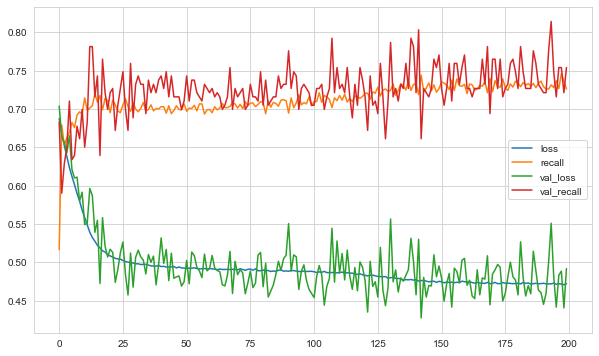

In [47]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [48]:
model.evaluate(X_test, y_test, verbose=0)

[0.4796014130115509, 0.7598039507865906]

In [50]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("Test_loss : ", loss)
print("Test_Recall : ", recall)

Test_loss :  0.4796014130115509
Test_Recall :  0.7598039507865906


In [51]:
y_pred = model.predict(X_test) > 0.5 
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 839us/step
[[611 185]
 [ 49 155]]
              precision    recall  f1-score   support

           0       0.93      0.77      0.84       796
           1       0.46      0.76      0.57       204

    accuracy                           0.77      1000
   macro avg       0.69      0.76      0.70      1000
weighted avg       0.83      0.77      0.78      1000



32/32 [==============================] - 0s 887us/step


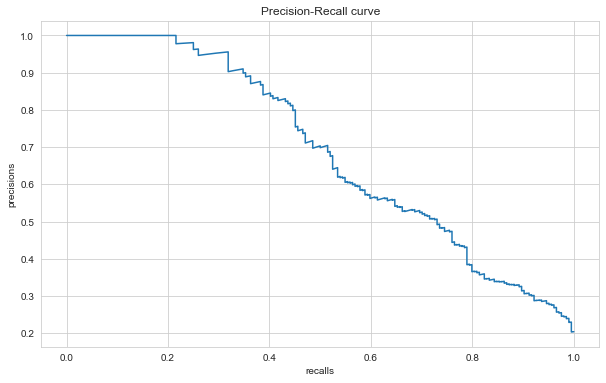

In [52]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve');

In [54]:
average_precision_score(y_test,y_pred_proba)

0.6899298521697624

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

### Add Dropout Layer

In [56]:
from tensorflow.keras.layers import Dropout

In [68]:
model = Sequential()
model.add(Dense(12, activation="relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.25))
model.add(Dense(6, activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(1, activation="sigmoid"))
opt = Adam(lr = 0.001) # default 
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [69]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 64, epochs = 200, verbose = 1, class_weight=class_weights)

Epoch 1/200
127/127 [==============================] - 1s 3ms/step - loss: 0.6968 - recall: 0.5933 - val_loss: 0.6827 - val_recall: 0.5574
Epoch 2/200
127/127 [==============================] - 0s 1ms/step - loss: 0.6857 - recall: 0.6812 - val_loss: 0.6733 - val_recall: 0.5956
Epoch 3/200
127/127 [==============================] - 0s 2ms/step - loss: 0.6819 - recall: 0.6879 - val_loss: 0.6743 - val_recall: 0.6066
Epoch 4/200
127/127 [==============================] - 0s 2ms/step - loss: 0.6770 - recall: 0.6921 - val_loss: 0.6634 - val_recall: 0.6011
Epoch 5/200
127/127 [==============================] - 0s 2ms/step - loss: 0.6728 - recall: 0.6733 - val_loss: 0.6707 - val_recall: 0.6339
Epoch 6/200
127/127 [==============================] - 0s 1ms/step - loss: 0.6696 - recall: 0.6745 - val_loss: 0.6610 - val_recall: 0.6339
Epoch 7/200
127/127 [==============================] - 0s 1ms/step - loss: 0.6624 - recall: 0.6424 - val_loss: 0.6494 - val_recall: 0.6120
Epoch 8/200
127/127 [======

127/127 [==============================] - 0s 2ms/step - loss: 0.5242 - recall: 0.7242 - val_loss: 0.4854 - val_recall: 0.7322
Epoch 118/200
127/127 [==============================] - 0s 2ms/step - loss: 0.5279 - recall: 0.7103 - val_loss: 0.4798 - val_recall: 0.7377
Epoch 119/200
127/127 [==============================] - 0s 1ms/step - loss: 0.5237 - recall: 0.6982 - val_loss: 0.5055 - val_recall: 0.7869
Epoch 120/200
127/127 [==============================] - 0s 1ms/step - loss: 0.5241 - recall: 0.7067 - val_loss: 0.4718 - val_recall: 0.7213
Epoch 121/200
127/127 [==============================] - 0s 2ms/step - loss: 0.5255 - recall: 0.7079 - val_loss: 0.4913 - val_recall: 0.7432
Epoch 122/200
127/127 [==============================] - 0s 1ms/step - loss: 0.5272 - recall: 0.6988 - val_loss: 0.4845 - val_recall: 0.7377
Epoch 123/200
127/127 [==============================] - 0s 1ms/step - loss: 0.5190 - recall: 0.7042 - val_loss: 0.4760 - val_recall: 0.7268
Epoch 124/200
127/127 [====

<AxesSubplot:>

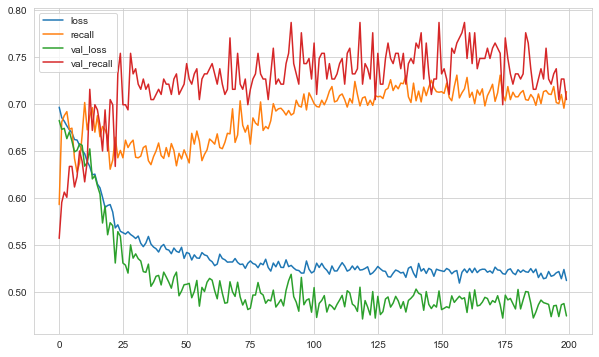

In [70]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [71]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("Test_loss : ", loss)
print("Test_Recall : ", recall)

loss :  0.46436506509780884
Recall :  0.7058823704719543


In [72]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 839us/step
[[649 147]
 [ 60 144]]
              precision    recall  f1-score   support

           0       0.92      0.82      0.86       796
           1       0.49      0.71      0.58       204

    accuracy                           0.79      1000
   macro avg       0.71      0.76      0.72      1000
weighted avg       0.83      0.79      0.81      1000



### Add Early Stop

#### Monitor the "val_loss" as metric

In [73]:
model = Sequential()
model.add(Dense(12, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(6, activation = "relu"))
model.add(Dense(1, activation  = "sigmoid"))
opt = Adam(lr = 0.001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [74]:
early_stop = EarlyStopping(monitor="val_loss", mode="min",verbose=1,patience=25, restore_best_weights = True)

In [75]:
model.fit(x=X_train, y=y_train,validation_split=0.1, batch_size=64,verbose=1,epochs=200,  callbacks=[early_stop], class_weight=class_weights)

Epoch 1/200
127/127 [==============================] - 1s 3ms/step - loss: 0.7027 - recall: 0.2382 - val_loss: 0.6628 - val_recall: 0.5628
Epoch 2/200
127/127 [==============================] - 0s 2ms/step - loss: 0.6820 - recall: 0.5861 - val_loss: 0.6464 - val_recall: 0.4863
Epoch 3/200
127/127 [==============================] - 0s 2ms/step - loss: 0.6573 - recall: 0.5994 - val_loss: 0.6472 - val_recall: 0.5738
Epoch 4/200
127/127 [==============================] - 0s 2ms/step - loss: 0.6300 - recall: 0.6424 - val_loss: 0.6196 - val_recall: 0.6175
Epoch 5/200
127/127 [==============================] - 0s 1ms/step - loss: 0.6131 - recall: 0.7012 - val_loss: 0.6757 - val_recall: 0.7432
Epoch 6/200
127/127 [==============================] - 0s 1ms/step - loss: 0.6048 - recall: 0.6842 - val_loss: 0.6079 - val_recall: 0.6284
Epoch 7/200
127/127 [==============================] - 0s 2ms/step - loss: 0.5988 - recall: 0.6970 - val_loss: 0.6241 - val_recall: 0.6612
Epoch 8/200
127/127 [======

127/127 [==============================] - 0s 1ms/step - loss: 0.4791 - recall: 0.7473 - val_loss: 0.4770 - val_recall: 0.7869
Epoch 118/200
127/127 [==============================] - 0s 1ms/step - loss: 0.4787 - recall: 0.7564 - val_loss: 0.4659 - val_recall: 0.7541
Epoch 119/200
127/127 [==============================] - 0s 1ms/step - loss: 0.4787 - recall: 0.7515 - val_loss: 0.4680 - val_recall: 0.7814
Epoch 120/200
127/127 [==============================] - 0s 2ms/step - loss: 0.4794 - recall: 0.7497 - val_loss: 0.4665 - val_recall: 0.7705
Epoch 121/200
127/127 [==============================] - 0s 1ms/step - loss: 0.4797 - recall: 0.7503 - val_loss: 0.4631 - val_recall: 0.7541
Epoch 122/200
127/127 [==============================] - 0s 1ms/step - loss: 0.4790 - recall: 0.7576 - val_loss: 0.4904 - val_recall: 0.7869
Epoch 123/200
127/127 [==============================] - 0s 2ms/step - loss: 0.4792 - recall: 0.7461 - val_loss: 0.4558 - val_recall: 0.7322
Epoch 124/200
127/127 [====

<AxesSubplot:>

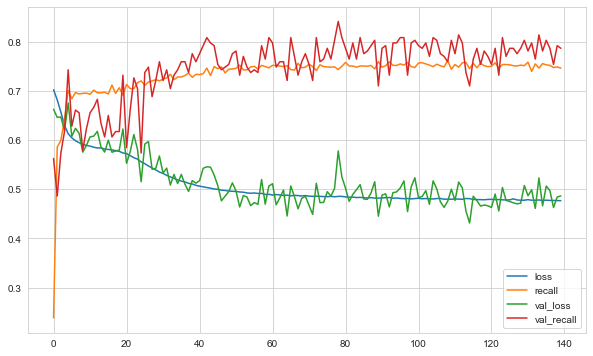

In [76]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [77]:
y_pred = model.predict(X_test) > 0.5 
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 839us/step
[[655 141]
 [ 62 142]]
              precision    recall  f1-score   support

           0       0.91      0.82      0.87       796
           1       0.50      0.70      0.58       204

    accuracy                           0.80      1000
   macro avg       0.71      0.76      0.72      1000
weighted avg       0.83      0.80      0.81      1000



#### Monitor the "val_recall" as metric

In [78]:
model = Sequential()
model.add(Dense(12, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(6, activation = "relu"))
model.add(Dense(1, activation  = "sigmoid"))
opt = Adam(lr = 0.001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [79]:
early_stop = EarlyStopping(monitor="val_recall", mode="max",verbose=1, patience=20, restore_best_weights = True)

In [80]:
model.fit(x=X_train, y=y_train,validation_split=0.1, batch_size=64,verbose=1,epochs=200, callbacks=[early_stop],class_weight=class_weights)

Epoch 1/200
127/127 [==============================] - 1s 2ms/step - loss: 0.7017 - recall: 0.2412 - val_loss: 0.6762 - val_recall: 0.6011
Epoch 2/200
127/127 [==============================] - 0s 1ms/step - loss: 0.6748 - recall: 0.6333 - val_loss: 0.6718 - val_recall: 0.6503
Epoch 3/200
127/127 [==============================] - 0s 1ms/step - loss: 0.6550 - recall: 0.6224 - val_loss: 0.6343 - val_recall: 0.5847
Epoch 4/200
127/127 [==============================] - 0s 1ms/step - loss: 0.6336 - recall: 0.6382 - val_loss: 0.6302 - val_recall: 0.6393
Epoch 5/200
127/127 [==============================] - 0s 1ms/step - loss: 0.6185 - recall: 0.6606 - val_loss: 0.6571 - val_recall: 0.7049
Epoch 6/200
127/127 [==============================] - 0s 1ms/step - loss: 0.6078 - recall: 0.6879 - val_loss: 0.6104 - val_recall: 0.6393
Epoch 7/200
127/127 [==============================] - 0s 1ms/step - loss: 0.6007 - recall: 0.6848 - val_loss: 0.6165 - val_recall: 0.6557
Epoch 8/200
127/127 [======

<AxesSubplot:>

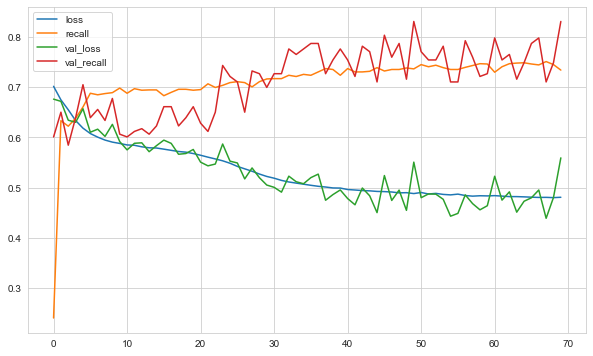

In [81]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [82]:
y_pred = model.predict(X_test) > 0.5 
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 871us/step
[[555 241]
 [ 42 162]]
              precision    recall  f1-score   support

           0       0.93      0.70      0.80       796
           1       0.40      0.79      0.53       204

    accuracy                           0.72      1000
   macro avg       0.67      0.75      0.67      1000
weighted avg       0.82      0.72      0.74      1000



## GridSearchCV

In [94]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [95]:
def build_classifier(optimizer, learn_rate):
    classifier = Sequential()
    classifier.add(Dense(units = 12, activation = 'relu'))
    classifier.add(Dropout(0.25))
    classifier.add(Dense(units = 6, activation = 'relu'))
    classifier.add(Dropout(0.25))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer(learn_rate), loss = 'binary_crossentropy', metrics = ['Recall'])
    return classifier

In [96]:
early_stop = EarlyStopping(monitor = "val_recall", mode = "max", verbose = 1, patience = 15, restore_best_weights = True)

In [97]:
classifier_model = KerasClassifier(build_fn = build_classifier, validation_split = 0.1, epochs = 200)
parameters = {'batch_size': [64,128,256], 'optimizer': [Adam, RMSprop, Adadelta, Nadam], 'learn_rate': [0.001, 0.003, 0.005]}
grid_model = GridSearchCV(estimator = classifier_model,param_grid = parameters, scoring = 'recall', cv = 5, n_jobs = -1, verbose = 1)
grid_model.fit(X_train, y_train, callbacks = [early_stop], class_weight=class_weights)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Epoch 1/200
64/64 [==============================] - 1s 4ms/step - loss: 0.6943 - recall: 0.5000 - val_loss: 0.6745 - val_recall: 0.5683
Epoch 2/200
64/64 [==============================] - 0s 2ms/step - loss: 0.6665 - recall: 0.6200 - val_loss: 0.6154 - val_recall: 0.5464
Epoch 3/200
64/64 [==============================] - 0s 2ms/step - loss: 0.6423 - recall: 0.6042 - val_loss: 0.6825 - val_recall: 0.7377
Epoch 4/200
64/64 [==============================] - 0s 2ms/step - loss: 0.6259 - recall: 0.6333 - val_loss: 0.6030 - val_recall: 0.6120
Epoch 5/200
64/64 [==============================] - 0s 2ms/step - loss: 0.6127 - recall: 0.6230 - val_loss: 0.5847 - val_recall: 0.6284
Epoch 6/200
64/64 [==============================] - 0s 2ms/step - loss: 0.6007 - recall: 0.6473 - val_loss: 0.5652 - val_recall: 0.6120
Epoch 7/200
64/64 [==============================] - 0s 2ms/step - loss: 0.5912 - recall: 0.6527 - val_loss: 0.6008 

GridSearchCV(cv=5,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x000001DBF1B7F340>,
             n_jobs=-1,
             param_grid={'batch_size': [64, 128, 256],
                         'learn_rate': [0.001, 0.003, 0.005],
                         'optimizer': [<class 'keras.optimizers.optimizer_v2.adam.Adam'>,
                                       <class 'keras.optimizers.optimizer_v2.rmsprop.RMSprop'>,
                                       <class 'keras.optimizers.optimizer_v2.adadelta.Adadelta'>,
                                       <class 'keras.optimizers.optimizer_v2.nadam.Nadam'>]},
             scoring='recall', verbose=1)

In [98]:
grid_model.best_score_

0.8308532006907898

In [99]:
grid_model.best_params_

{'batch_size': 128,
 'learn_rate': 0.005,
 'optimizer': keras.optimizers.optimizer_v2.adam.Adam}

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [100]:
grid_result = pd.DataFrame(grid_model.cv_results_)[["mean_test_score", "std_test_score", "rank_test_score", "params"]].sort_values(by="rank_test_score")
grid_result

,mean_test_score,std_test_score,rank_test_score,params
20,0.831,0.024,1,"{'batch_size': 128, 'learn_rate': 0.005, 'opti..."
9,0.826,0.049,2,"{'batch_size': 64, 'learn_rate': 0.005, 'optim..."
35,0.810,0.043,3,"{'batch_size': 256, 'learn_rate': 0.005, 'opti..."
23,0.808,0.025,4,"{'batch_size': 128, 'learn_rate': 0.005, 'opti..."
15,0.806,0.080,5,"{'batch_size': 128, 'learn_rate': 0.001, 'opti..."
12,0.804,0.062,6,"{'batch_size': 128, 'learn_rate': 0.001, 'opti..."
11,0.801,0.020,7,"{'batch_size': 64, 'learn_rate': 0.005, 'optim..."
8,0.800,0.029,8,"{'batch_size': 64, 'learn_rate': 0.005, 'optim..."
7,0.800,0.040,9,"{'batch_size': 64, 'learn_rate': 0.003, 'optim..."
33,0.795,0.047,10,"{'batch_size': 256, 'learn_rate': 0.005, 'opti..."


In [101]:
y_pred = grid_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 837us/step
[[565 231]
 [ 43 161]]
              precision    recall  f1-score   support

           0       0.93      0.71      0.80       796
           1       0.41      0.79      0.54       204

    accuracy                           0.73      1000
   macro avg       0.67      0.75      0.67      1000
weighted avg       0.82      0.73      0.75      1000



32/32 [==============================] - 0s 839us/step


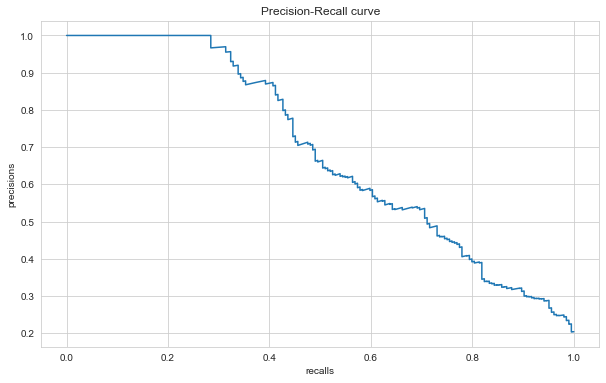

In [102]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve');

In [103]:
average_precision_score(y_test,y_pred_proba)

0.6886071316939736

# Final Model and Model Deployment

In [104]:
model = Sequential()
model.add(Dense(12, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(6, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))
opt = Adam(lr = 0.005)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [108]:
early_stop = EarlyStopping(monitor = "val_recall", mode = "max", verbose = 1, patience = 20, restore_best_weights = True)

In [109]:
model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), batch_size = 128, epochs = 200, verbose = 1,
          callbacks = [early_stop], class_weight= class_weights)

Epoch 1/200
71/71 [==============================] - 0s 2ms/step - loss: 0.5231 - recall: 0.7207 - val_loss: 0.4940 - val_recall: 0.7353
Epoch 2/200
71/71 [==============================] - 0s 2ms/step - loss: 0.5167 - recall: 0.7185 - val_loss: 0.5322 - val_recall: 0.7745
Epoch 3/200
71/71 [==============================] - 0s 2ms/step - loss: 0.5098 - recall: 0.7305 - val_loss: 0.4828 - val_recall: 0.7402
Epoch 4/200
71/71 [==============================] - 0s 2ms/step - loss: 0.5092 - recall: 0.7229 - val_loss: 0.5544 - val_recall: 0.7990
Epoch 5/200
71/71 [==============================] - 0s 2ms/step - loss: 0.5052 - recall: 0.7343 - val_loss: 0.4329 - val_recall: 0.6225
Epoch 6/200
71/71 [==============================] - 0s 2ms/step - loss: 0.5051 - recall: 0.7190 - val_loss: 0.5046 - val_recall: 0.7745
Epoch 7/200
71/71 [==============================] - 0s 2ms/step - loss: 0.5031 - recall: 0.7278 - val_loss: 0.4618 - val_recall: 0.7353
Epoch 8/200
71/71 [======================

<AxesSubplot:>

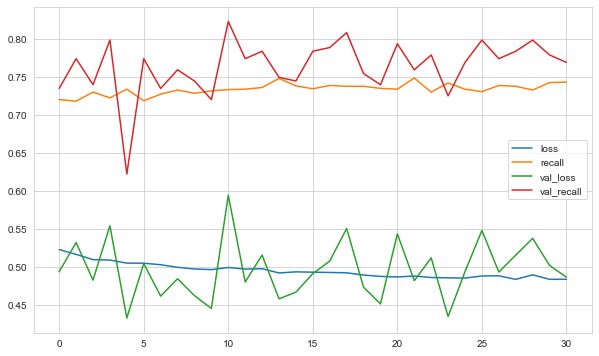

In [110]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [111]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 871us/step
[[519 277]
 [ 36 168]]
              precision    recall  f1-score   support

           0       0.94      0.65      0.77       796
           1       0.38      0.82      0.52       204

    accuracy                           0.69      1000
   macro avg       0.66      0.74      0.64      1000
weighted avg       0.82      0.69      0.72      1000



## Prediction

In [112]:
import pickle
pickle.dump(scaler, open("scaler_churn", 'wb'))

In [113]:
model.save('model_churn.h5')

In [114]:
from tensorflow.keras.models import load_model
model_churn = load_model('model_churn.h5')
scaler_churn = pickle.load(open("scaler_churn", "rb"))

In [115]:
churn = df.drop('Exited', axis = 1).iloc[224:225, :]
churn

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
224,671,45,6,99564.220,1,1,1,108872.450


In [116]:
churn = scaler_churn.transform(churn) # Scale imizi transform yapıyoruz yoksa sonuçlarımız yanlış gelir
churn

array([[0.642     , 0.36486486, 0.6       , 0.39683132, 0.        ,
        1.        , 1.        , 0.54435634]])

In [117]:
(model_churn.predict(churn) > 0.5).astype("int32")

1/1 [==============================] - 0s 40ms/step


array([[1]])

In [118]:
df["Exited"].iloc[0]

1

In [119]:
df.iloc[224:225, :]['Exited']

224    1
Name: Exited, dtype: int64

### Comparison with ML

In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [121]:
log_model=LogisticRegression(class_weight = 'balanced')
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[560 236]
 [ 58 146]]
              precision    recall  f1-score   support

           0       0.91      0.70      0.79       796
           1       0.38      0.72      0.50       204

    accuracy                           0.71      1000
   macro avg       0.64      0.71      0.65      1000
weighted avg       0.80      0.71      0.73      1000



In [122]:
rf_model = RandomForestClassifier(class_weight = 'balanced')
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[770  26]
 [118  86]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.91       796
           1       0.77      0.42      0.54       204

    accuracy                           0.86      1000
   macro avg       0.82      0.69      0.73      1000
weighted avg       0.85      0.86      0.84      1000



___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___